In [3]:
import plotly
import plotly.graph_objs as go
import numpy as np

In [4]:
maig = np.load('/Users/manmanzhang/Downloads/imag1.npz')
maig.files

['arr_0']

In [5]:
array = maig['arr_0']

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
import numpy as np
from PIL import Image

path = '/Users/manmanzhang/Downloads/imag1.png'
imag1 =Image.open(path)
print(imag1)
imag2 = imag1.convert('L')
# print(imag2.show())
# 自定义灰度界限，大于这个值为黑色，小于这个值为白色
print(sigmoid(np.array(imag2)).shape)
print(sigmoid(np.array(imag2)).ndim)
print(sigmoid(np.array(imag2)))
imag2 = (sigmoid(np.array(imag2)))
imag2 = np.asanyarray(imag2,dtype=np.uint16)
print(imag2)
imag2 = Image.fromarray(imag2)
print(imag2.show())

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=280x158 at 0x122EE6ED0>
(158, 280)
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
None


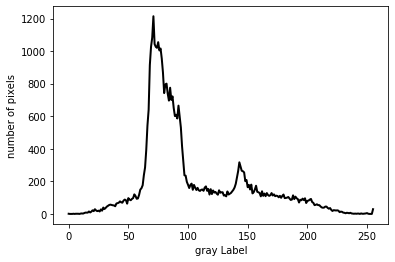

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
path = '/Users/manmanzhang/Downloads/imag1.png'
def calcGrayHist(I):
    # 计算灰度直方图
    h, w = I.shape[:2]
    grayHist = np.zeros([256], np.uint64)
    for i in range(h):
        for j in range(w):
            grayHist[I[i][j]] += 1
    return grayHist
 
img = cv.imread(path, 0)
grayHist = calcGrayHist(img)
x = np.arange(256)
# 绘制灰度直方图
plt.plot(x, grayHist, 'r', linewidth=2, c='black')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()
cv.imshow("img", img)
cv.waitKey()


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
path = '/Users/manmanzhang/Downloads/imag1.png'
# 绘制直方图函数
def grayHist(img):
    h, w = img.shape[:2]
    pixelSequence = img.reshape([h * w, ])
    numberBins = 256
    histogram, bins, patch = plt.hist(pixelSequence, numberBins,
                                      facecolor='black', histtype='bar')
    plt.xlabel("gray label")
    plt.ylabel("number of pixels")
    plt.axis([0, 255, 0, np.max(histogram)])
    plt.show()
 
img = cv.imread(path, 0)
out = 2.0 * img
# 进行数据截断，大于255的值截断为255
out[out > 255] = 255
# 数据类型转换
out = np.around(out)
out = out.astype(np.uint8)
# 分别绘制处理前后的直方图
# grayHist(img)
# grayHist(out)
cv.imshow("img", img)
cv.imshow("out", out)
cv.waitKey(10)



-1

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
path = "/Users/manmanzhang/Downloads/imag1.png"
img = cv.imread(path, 0)
fi = img / 255.0
gamma = 0.4
out = np.power(fi, gamma)
cv.imshow("img", img)
cv.imshow("out", out)

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))
def gamma_show(gamma):
    path = "/Users/manmanzhang/Downloads/imag1.png"
    img = cv.imread(path, 0)
    fi = img / 255.0
    out = np.power(fi, gamma)
    cv.imshow("img1", img)
    cv.imshow("out", out)
    return out
img = gamma_show(0.9)
a = 100
O = float(a) * img
O[O>255] = 255 #大于255要截断为255
    
#数据类型的转换
O = np.round(O)
O = O.astype(np.uint8)
    
#显示原图与变换后的图的效果
cv.imshow("img", sigmoid(img))
cv.imshow("O", O)

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def gamma_show(gamma):
    path = "/Users/manmanzhang/Downloads/imag1.png"
    img = cv.imread(path, 0)
    fi = img / 255.0
    out = np.power(fi, gamma)
    cv.imshow("img1", img)
    cv.imshow("out", np.log(out))
    return out
img = gamma_show(1.2)

In [48]:
xonedim = np.ravel(img)
x = np.c_[xonedim,xonedim]
model_onecalsssvm = svm.OneClassSVM(nu=0.1, kernel="rbf", random_state=0) 
model_onecalsssvm.fit(xdata) 
pre_test_outliers = model_onecalsssvm.predict(xdata) 
toal_test_data = np.hstack((x[:,:2], pre_test_outliers.reshape(x[:,:2].shape[0], 1)))
outlier_test_data = toal_test_data[toal_test_data[:, -1] == -1]

In [49]:
outlier_test_data[:,0].mean(),outlier_test_data[:,0].shape

(0.44345822119377, (4387,))

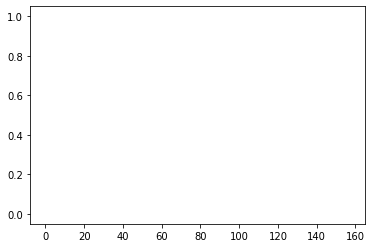

In [53]:
m,n=img.shape
for i in img:
    m-=1
    for j in i:
        plt.plot(m,j)
plt.show()

In [45]:
from sklearn.cluster import KMeans
# 定义模型
model = KMeans(n_clusters=2)
# 模型拟合
model.fit(x)
# 为每个示例分配一个集群
yhat = model.predict(x)# 定义模型
x[yhat==0].mean()

0.5668835272973454

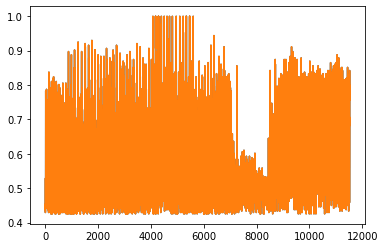

In [51]:
plt.plot(x[yhat==0])
plt.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = "/Users/manmanzhang/Downloads/imag1.png"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)#GRAYSCALE
#线性变换
a = 100
O = float(a) * img
O[O>255] = 255 #大于255要截断为255
    
#数据类型的转换
O = np.round(O)
O = O.astype(np.uint8)
    
#显示原图与变换后的图的效果
cv2.imshow("img", img)
cv2.imshow("O", O)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
def equalHist(img):
    # 灰度图像矩阵的高、宽
    h, w = img.shape
    # 第一步：计算灰度直方图
    grayHist = calcGrayHist(img)
    # 第二步：计算累加灰度直方图
    zeroCumuMoment = np.zeros([256], np.uint32)
    for p in range(256):
        if p == 0:
            zeroCumuMoment[p] = grayHist[0]
        else:
            zeroCumuMoment[p] = zeroCumuMoment[p - 1] + grayHist[p]
    # 第三步：根据累加灰度直方图得到输入灰度级和输出灰度级之间的映射关系
    outPut_q = np.zeros([256], np.uint8)
    cofficient = 256.0 / (h * w)
    for p in range(256):
        q = cofficient * float(zeroCumuMoment[p]) - 1
        if q >= 0:
            outPut_q[p] = math.floor(q)
        else:
            outPut_q[p] = 0
    # 第四步：得到直方图均衡化后的图像
    equalHistImage = np.zeros(img.shape, np.uint8)
    for i in range(h):
        for j in range(w):
            equalHistImage[i][j] = outPut_q[img[i][j]]
    return equalHistImage
 
img = cv.imread("/Users/manmanzhang/Downloads/imag1.png", 0)
# 使用自己写的函数实现
equa = equalHist(blur)
# grayHist(img, equa)
# 使用OpenCV提供的直方图均衡化函数实现
# equa = cv.equalizeHist(img)
cv.imshow("img", img)
cv.imshow("equa", equa)
cv.waitKey()



NameError: name 'cv' is not defined

In [1]:
from PIL import Image
import numpy as np
imag1 = Image.open('/Users/manmanzhang/Downloads/imag1.png')
print(imag1)
imag2 = imag1.convert('L')
gamma = 0.4
# 自定义灰度界限，大于这个值为黑色，小于这个值为白色
imag2 = np.power((np.array(imag2)/255),gamma)
imag2 = np.asanyarray(imag2,dtype=np.uint16)
imag2 = Image.fromarray(imag2)
imag2.show()

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=280x158 at 0x117BA6910>


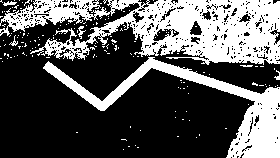

In [16]:
from PIL import Image
imag1 =Image.open('/Users/manmanzhang/Downloads/imag1.png')
imag2 = imag1.convert('L')
# print(imag2.show())
# 自定义灰度界限，大于这个值为黑色，小于这个值为白色
threshold = 100
table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)
    # 图片二值化，此处第二个参数为数字一
imag3 = imag2.point(table, '1')
imag3

In [ ]:
imag1 = imag3
print(imag1.show())
# pixel1 = imag1.load()[30,30]
# print(pixel1)
# 计算两个灰度图像之间的结构相似度指数
print(imag2.show())

def is_smilar(imag1,imag2,x,y):
    pixel1 = imag1.load()[x,y]
    # print(pixel1)
    pixel2 = imag2.load()[x,y]
    # print(imag2.load())
    threhold = 60
    if abs(pixel1 - pixel2)< threhold :
        return True
    else:
        return False
    #找到缺口位置

def get_diff_location():
    left = 0
    for x in range(left,imag1.size[0]):
        for y in range(imag1.size[1]):
            if not is_smilar(imag1,imag2,x,y):
                print(x,y)
get_diff_location()

In [16]:
def is_smilar(imag1,imag2,x,y):
    pixel1 = imag1.load()[x,y]
    # print(pixel1)
    pixel2 = imag2.load()[x,y]
    # print(imag2.load())
    threhold = 60
    if abs(pixel1 - pixel2)< threhold :
        return True
    else:
        return False
    #找到缺口位置

def get_diff_location():
    left = 0
    for x in range(left,imag1.size[0]):
        for y in range(imag1.size[1]):
            if not is_smilar(imag1,imag2,x,y):
                print(x,y)
get_diff_location()


262 6
262 7
262 8
262 9
262 10
262 11
262 12
262 13
262 14
262 15
262 16
262 17
262 18
262 19
262 20
262 21
262 22
262 23
262 24
262 25
262 26
262 27
262 28
262 29
262 30
262 31
262 32
262 33
262 34
262 35
262 36
262 37
262 38
262 39
262 40
262 41
262 42
262 43
262 44
262 45
262 46
262 47
26248
262 49
262 50
262 51
262 52
262 53
262 54
262 55
262 56
262 57
262 58
262 59
262 60
262 61
262 62
262 63
262 64
262 65
262 66
262 69
262 70
262 71
262 72
262 73
262 74
262 75
262 76
262 77
262 78
262 79
262 80
262 81
262 82
262 83
262 84
262 85
262 86
262 87
262 88
262 89
262 90
262 91
262 92
262 93
262 94
262 95
262 96
262 97
262 98
262 99
262 100
262 101
262 102
262 103
262 104
262 105
262 106
262 107
262 108
262 109
262 110
262 111
262 112
262 113
262 114
262 115
262 116
262 117
262 118
262 119
262 120
262 121
262 122
262 123
262 124
262 125
262 126
262 127
262 128
262 129
262 130
262 131
262 132
262 133
262 134
262 135
262 136
262 137
262 138
262 139
262 140
262 141
262 142
262 143
262 144
2